[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128.]


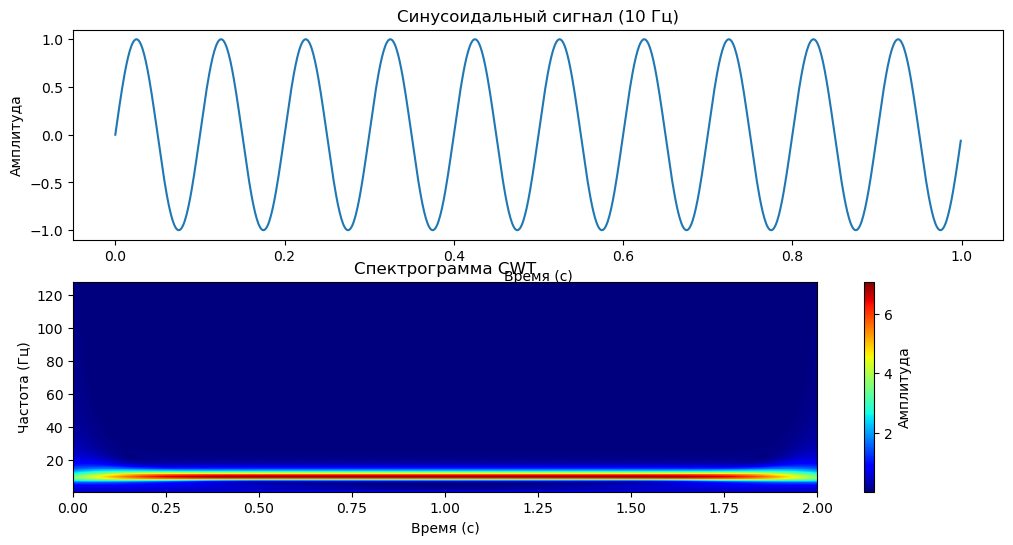

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import pywt

def cwt_spectrogram(x, fs, nNotes=12, detrend=True, normalize=True):
    if detrend:
        x = scipy.signal.detrend(x)
    if normalize:
        x = (x - np.mean(x)) / np.std(x)

    scales = pywt.scale2frequency('cmor1.5-1.0', np.arange(1, 128+ 1)) / (1/fs)
    cwtmatr, freqs = pywt.cwt(x, scales, 'cmor1.5-1.0')
    
    return cwtmatr, freqs

# Создание синусоидального сигнала с частотой 10 Гц
fs = 1000  # Частота дискретизации
t = np.arange(0, 1, 1/fs)
f = 10  # Частота синусоиды
sig = np.sin(2 * np.pi * f * t)
# Вычисление спектрограммы с помощью CWT
cwtmatr, freqs = cwt_spectrogram(sig, fs)
cwtmatr = cwtmatr[::-1, :]
freqs = freqs*1000
print(freqs)
# Отображение сигнала и спектрограммы
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, sig)
plt.title('Синусоидальный сигнал (10 Гц)')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')

plt.subplot(2, 1, 2)
plt.imshow(np.abs(cwtmatr), extent=[0, 2, freqs[0], freqs[-1]], aspect='auto', cmap='jet')
plt.colorbar(label='Амплитуда')
plt.title('Спектрограмма CWT')
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

C:\Users\ko4nd\AppData\Local\Temp\ipykernel_15952\401631846.py:1: UserWarning: Only one segment is calculated since parameter NFFT (=128) >= signal length (=24).
  plt.specgram(np.abs(cwtmatr), NFFT = 128, Fs=1/fs, noverlap=120, cmap = "jet")


(array([[33.6313738 ],
        [63.94716468],
        [54.96209803],
        [42.77714501],
        [30.34623419],
        [20.00718986],
        [12.8259202 ],
        [ 8.60803524],
        [ 6.4212645 ],
        [ 5.24649315],
        [ 4.40895959],
        [ 3.66042254],
        [ 3.01338257],
        [ 2.52798544],
        [ 2.19827448],
        [ 1.95986991],
        [ 1.75094728],
        [ 1.55117257],
        [ 1.37349672],
        [ 1.23291043],
        [ 1.12688496],
        [ 1.03980448],
        [ 0.95856457],
        [ 0.88112531],
        [ 0.81239558],
        [ 0.75540365],
        [ 0.70761904],
        [ 0.66430207],
        [ 0.62332503],
        [ 0.58603057],
        [ 0.5542045 ],
        [ 0.52727574],
        [ 0.50270813],
        [ 0.47857543],
        [ 0.4551988 ],
        [ 0.43426534],
        [ 0.41673348],
        [ 0.40184281],
        [ 0.3880036 ],
        [ 0.37430962],
        [ 0.36105849],
        [ 0.34900844],
        [ 0.33842651],
        [ 0

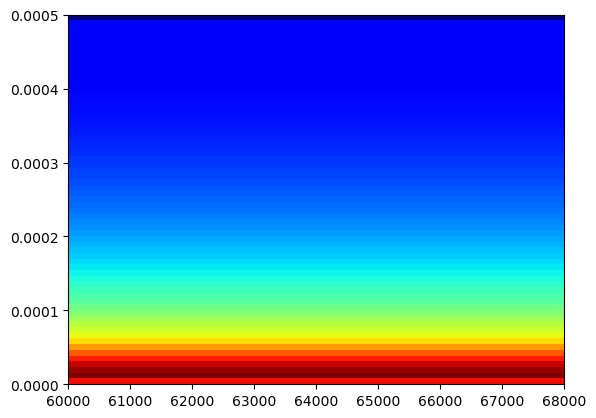

In [45]:
plt.specgram(np.abs(cwtmatr), NFFT = 128, Fs=1/fs, noverlap=120, cmap = "jet")

In [42]:
print(cwtmatr)

[[ 0.07290552+0.50610296j  0.07340054+0.50631602j  0.07321342+0.50653874j
  ... -0.07086775+0.50733897j -0.0724151 +0.50710357j
  -0.07328391+0.5068734j ]
 [ 0.39278627+0.2494178j   0.39268328+0.25520504j  0.3908566 +0.26095184j
  ... -0.37952684+0.27256733j -0.38732492+0.26706845j
  -0.39086813+0.26138648j]
 [ 0.62141007+0.181876j    0.62253657+0.19262408j  0.62107503+0.20335388j
  ... -0.57576258+0.2466759j  -0.58977112+0.23534656j
  -0.59533997+0.22353196j]
 ...
 [-0.52742382+0.03336419j -0.52622585-0.03057033j -0.5247597 -0.09632193j
  ...  0.49854747-0.13557425j  0.511731  -0.0734853j
   0.51861523-0.01041651j]
 [-0.46865813+0.08675083j -0.47407861+0.02649302j -0.47958186-0.03558373j
  ...  0.44088382-0.16939711j  0.45634046-0.11106834j
   0.46787531-0.05215579j]
 [-0.43277827+0.06205681j -0.43342234+0.00426515j -0.43408709-0.05539843j
  ...  0.40985187-0.12715584j  0.4254338 -0.07212428j
   0.42909113-0.01482323j]]


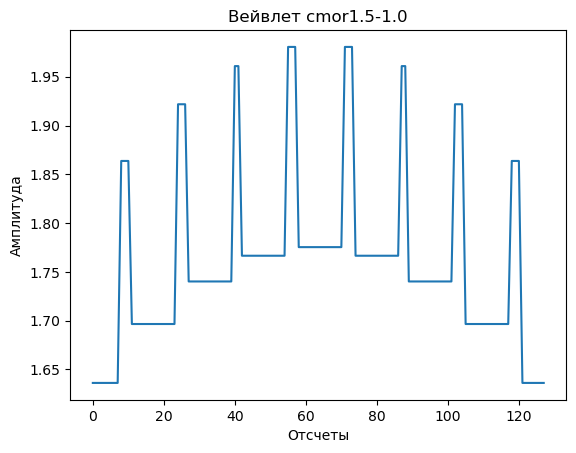

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

n = 128
signal = np.ones(n)
# Создаем вейвлет
scales = pywt.scale2frequency('cmor1.5-1.0', np.arange(1, n+1)) / (1/fs)
wavelet_data, _ = pywt.cwt(signal, scales, 'cmor1.5-1.0')

# Отображаем вейвлет
plt.plot(np.real(wavelet_data[0]))  # Вейвлет представлен в виде действительной части
plt.title('Вейвлет cmor1.5-1.0')
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.show()

108000


<function matplotlib.pyplot.show(close=None, block=None)>

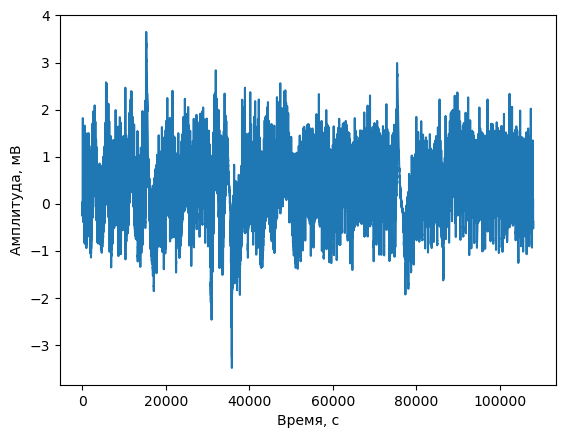

In [76]:
ecg_test = scipy.datasets.electrocardiogram()
print(len(ecg_test))
plt.plot(ecg_test)
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, мВ')
plt.show

[5.00000000e+02 4.85765971e+02 4.71937156e+02 4.58502022e+02
 4.45449359e+02 4.32768281e+02 4.20448208e+02 4.08478863e+02
 3.96850263e+02 3.85552706e+02 3.74576769e+02 3.63913296e+02
 3.53553391e+02 3.43488412e+02 3.33709964e+02 3.24209889e+02
 3.14980262e+02 3.06013386e+02 2.97301779e+02 2.88838174e+02
 2.80615512e+02 2.72626933e+02 2.64865774e+02 2.57325559e+02
 2.50000000e+02 2.42882985e+02 2.35968578e+02 2.29251011e+02
 2.22724680e+02 2.16384140e+02 2.10224104e+02 2.04239432e+02
 1.98425131e+02 1.92776353e+02 1.87288385e+02 1.81956648e+02
 1.76776695e+02 1.71744206e+02 1.66854982e+02 1.62104944e+02
 1.57490131e+02 1.53006693e+02 1.48650889e+02 1.44419087e+02
 1.40307756e+02 1.36313467e+02 1.32432887e+02 1.28662780e+02
 1.25000000e+02 1.21441493e+02 1.17984289e+02 1.14625505e+02
 1.11362340e+02 1.08192070e+02 1.05112052e+02 1.02119716e+02
 9.92125657e+01 9.63881766e+01 9.36441923e+01 9.09783239e+01
 8.83883476e+01 8.58721030e+01 8.34274909e+01 8.10524722e+01
 7.87450656e+01 7.650334

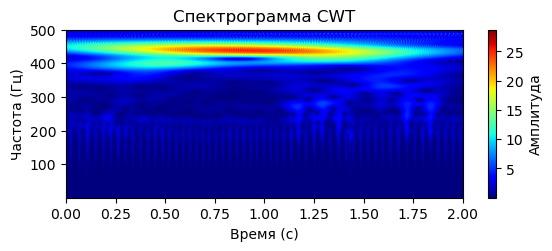

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import pywt

def cwt_spectrogram(x, fs, nNotes=12, detrend=True, normalize=True):
    if detrend:
        x = scipy.signal.detrend(x)
    if normalize:
        x = (x - np.mean(x)) / np.std(x)

    #scales = pywt.scale2frequency('cmor1.5-1.0', np.arange(1, 100+ 1)) / (1/fs)
    N = len(x)
    dt = 1.0/fs
    time = np.arange(N) * dt
    nOctaves = int(np.log2(2*np.floor(N/2.0)))
    scales = 2**np.arange(1, nOctaves, 1.0/nNotes)
    cwtmatr, freqs = pywt.cwt(x, scales, 'cmor1.5-1.0')
    
    return time, cwtmatr, freqs

# Создание синусоидального сигнала с частотой 10 Гц
fs = 1
# Вычисление спектрограммы с помощью CWT
t,cwtmatr, freqs = cwt_spectrogram(ecg_test[:10000], fs, nNotes = 24)
cwtmatr = cwtmatr[::-1, :]
freqs = freqs*1000
print(freqs)

plt.subplot(2, 1, 2)
plt.imshow(np.abs(cwtmatr), extent=[0, 2 , freqs[-1], freqs[0]], aspect='auto', cmap='jet')
plt.colorbar(label='Амплитуда')
plt.title('Спектрограмма CWT')
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

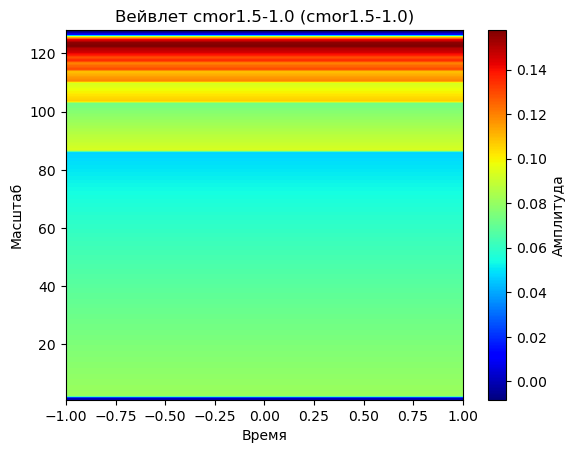

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Создаем вейвлет
wavelet = 'cmor1.5-1.0'
scales = np.arange(1, 128+1)
wavelet_data, _ = pywt.cwt([1], scales, wavelet, 1.5)

# Отображаем вейвлет
plt.imshow(np.real(wavelet_data), extent=[-1, 1, 1, 128], cmap='jet', aspect='auto')
plt.title(f'Вейвлет {wavelet} (cmor1.5-1.0)')
plt.xlabel('Время')
plt.ylabel('Масштаб')
plt.colorbar(label='Амплитуда')
plt.show()

D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


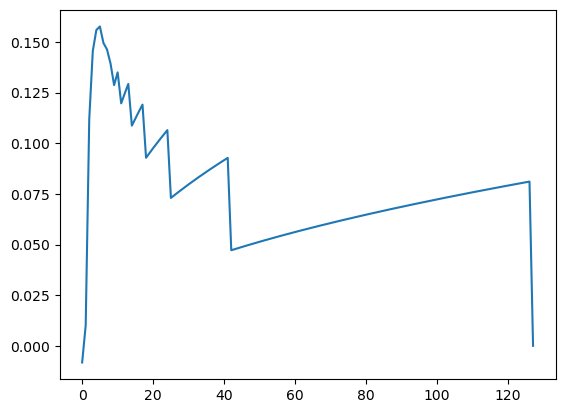

In [85]:
plt.plot((wavelet_data))